Function to scrape article text.

In [ ]:
def scrape_article_text(article_url):
    try:
        article_response = requests.get(article_url)
        if article_response.status_code == 200:
            # Parse the HTML content
            soup = BeautifulSoup(article_response.content, 'html.parser')

            # Try to find the main article text (this can vary between websites)
            # Common tags for article content: <p>, <div>, <article>
            paragraphs = soup.find_all('p')  # maybe change this on a site by site basis...

            # Extract and concatenate the text from the paragraphs
            article_text = ' '.join([para.get_text() for para in paragraphs])

            return article_text if article_text else "No text found"
        else:
            return f" {article_response.status_code}"

    except Exception as e:
        return f"{str(e)}"

This is the code for scraping stuff from newsdata for Donald Trump, from Argentina


In [ ]:
import requests
import json

API_KEY = 'pub_5570367654230de0d58eb82aad31471101c90'

url = f'https://newsdata.io/api/1/news?apikey=pub_5570367654230de0d58eb82aad31471101c90&q=argentina'

params = {
    'apikey': API_KEY,
    'q': '"Donald Trump" AND "elección"',
    'country': 'ar',  # country code for Argentina
    'language': 'es',  # Spanish language for Argentina
}

response = requests.get(url, params=params)


if response.status_code == 200:
    data_trump = response.json()

    #print(data)

    if 'results' in data_trump:
        articles_trump = data_trump['results']
        for i, article in enumerate(articles_trump, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")


Article 1:
Title: De Marchi pidió pasajes en business y se tomó un receso
Description: None
Published At: 2024-11-09 09:10:02
Source: elesquiu
Link: https://www.elesquiu.com/nacionales/2024/11/9/de-marchi-pidio-pasajes-en-business-se-tomo-un-receso-533468.html
--------------------------------------------------
Article 2:
Title: Alexandra Kohan: "El humor no debería tener límites"
Description: La psicoanalista publicó el ensayo El sentido del humor.“Reírse con otro es como estar desnudo”, asegura.
Published At: 2024-11-09 09:09:26
Source: clarin
Link: https://www.clarin.com/viva/alexandra-kohan-humor-deberia-tener-limites_0_94hzuNziwO.html
--------------------------------------------------
Article 3:
Title: Este año el té padeció más el ataque de ácaros
Description: El insecto es uno de los únicos enemigos que afecta al cultivo al comienzo de su zafra. En muchos casos provocó pérdidas casi totales. Recomiendan trabajar en la fertilización
Published At: 2024-11-09 09:05:32

This is the code for scraping stuff from newsdata for Kamala Harris, from Argentina


In [ ]:
params = {
    'apikey': API_KEY,
    'q': '"Kamala Harris" AND "elección"',
    'country': 'ar',  # country code for Argentina
    'language': 'es',  # Spanish language for Argentina
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data_harris = response.json()

    if 'results' in data_harris:
        articles_harris = data_harris['results']
        for i, article in enumerate(articles_harris, 1):
            print(f"Article {i}:")
            print(f"Title: {article.get('title')}")
            print(f"Description: {article.get('description')}")
            print(f"Published At: {article.get('pubDate')}")
            print(f"Source: {article.get('source_id')}")
            print(f"Link: {article.get('link')}")
            print("-" * 50)
    else:
        print("No articles found.")
else:
    print(f"Failed to fetch articles. Status code: {response.status_code}")

Article 1:
Title: De Marchi pidió pasajes en business y se tomó un receso
Description: None
Published At: 2024-11-09 09:10:02
Source: elesquiu
Link: https://www.elesquiu.com/nacionales/2024/11/9/de-marchi-pidio-pasajes-en-business-se-tomo-un-receso-533468.html
--------------------------------------------------
Article 2:
Title: Alexandra Kohan: "El humor no debería tener límites"
Description: La psicoanalista publicó el ensayo El sentido del humor.“Reírse con otro es como estar desnudo”, asegura.
Published At: 2024-11-09 09:09:26
Source: clarin
Link: https://www.clarin.com/viva/alexandra-kohan-humor-deberia-tener-limites_0_94hzuNziwO.html
--------------------------------------------------
Article 3:
Title: Este año el té padeció más el ataque de ácaros
Description: El insecto es uno de los únicos enemigos que afecta al cultivo al comienzo de su zafra. En muchos casos provocó pérdidas casi totales. Recomiendan trabajar en la fertilización
Published At: 2024-11-09 09:05:32

Article text

In [ ]:
from bs4 import BeautifulSoup

harris_texts = []
trump_texts = []

for i, article in enumerate(articles_harris, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    harris_texts.append(article_text)
    print(f"Article Text: {article_text}")

for i, article in enumerate(articles_trump, 1):
    article_url = article.get('link')
    article_text = scrape_article_text(article_url)
    trump_texts.append(article_text)
    print(f"Article Text: {article_text}")

Article Text: La presencia de Franco Colapinto en la Fórmula 1 convulsionó al deporte argentino. Claro, en cinco carreras en la “Máxima”, el pilarense demostró grandes habilidades y sumó puntos en dos oportunidades. Sin embargo, el piloto también despertó críticas, y en esta ocasión Alex Caniggia criticó su rendimiento. “Todo bien con @francolapinto, pero como lo están inflando al chico. Hasta acá, humo”, escribió el hijo de Claudio Paul Caniggia desatando la polémica en las redes. El tweet generó cientos de críticas que apuntaron contra la opinión de Alex, mientras recibió más de 1000 me gusta y 179 retweets.  Los elogios para Franco Colapinto parecen no tener fin en la Fórmula 1. Ahora, el tricampeón del mundo Max Verstappen le dedicó algunas palabras tras finalizar una accidentada carrera en el GP de México. “Franco está haciendo un gran trabajo desde que llegó a la Fórmula 1, siempre es lindo ver a jóvenes pilotos que llegan y lo hacen bien...", dijo el piloto que es el actual líde

In [ ]:
with open("harris_texts.txt", "w") as harris_file:
    for article_text in harris_texts:
        harris_file.write(article_text + "\n\n")

with open("trump_texts.txt", "w") as trump_file:
    for article_text in trump_texts:
        trump_file.write(article_text + "\n\n")

START HERE if replicating our results

Installing word cloud library

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get the stopwords for the specified language
    stop_words = set(stopwords.words("spanish"))

    # Add custom stop words
    custom_stopwords = {"numero", "n", "argentina"}
    stop_words = stop_words.union(custom_stopwords)

    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    cleaned_text = ' '.join(filtered_words)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Read the content of each file and store in respective variables
with open("../data/argentina_harris_texts.txt", "r") as file:
    harris_comb_texts = file.read()

with open("../data/argentina_trump_texts.txt", "r") as file:
    trump_comb_texts = file.read()

harris_comb_text = remove_stopwords(harris_comb_texts)
trump_comb_text = remove_stopwords(trump_comb_texts)

Dont run if replicating our results

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

trump_comb_text = ""
for i in trump_texts:
  trump_comb_text += i

trump_comb_text = remove_stopwords(trump_comb_text)

harris_comb_text = ""
for i in harris_texts:
  harris_comb_text += i

harris_comb_text = remove_stopwords(harris_comb_text)

NameError: name 'trump_texts' is not defined

Word clouds and frequency in Spanish

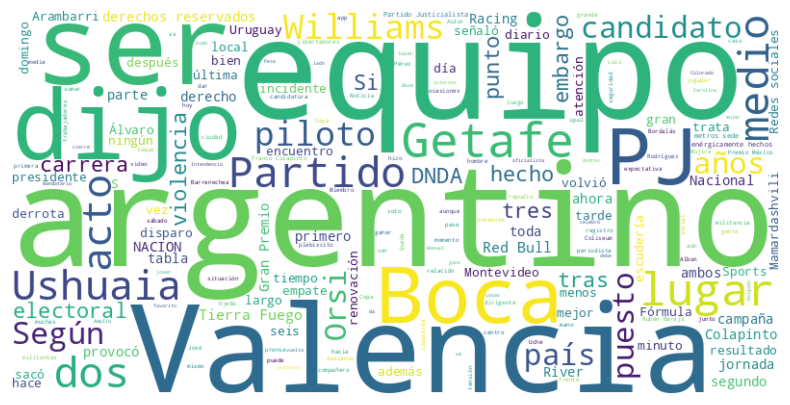

--------------------------------------------------


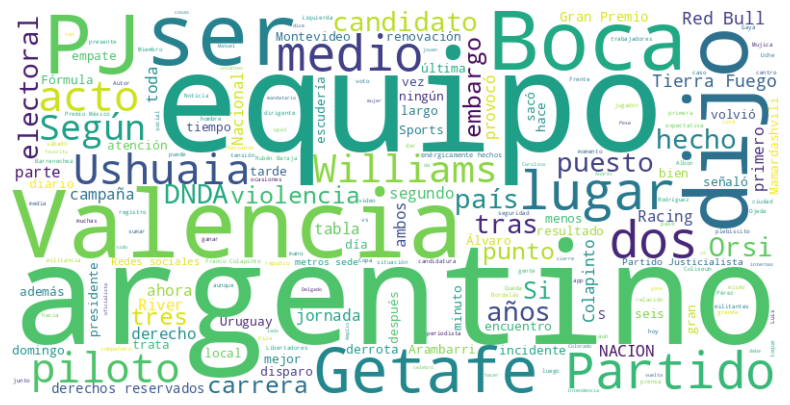

--------------------------------------------------
Word: argentino, Frequency: 1.0
Word: equipo, Frequency: 1.0
Word: Valencia, Frequency: 0.9230769230769231
Word: ser, Frequency: 0.7692307692307693
Word: dijo, Frequency: 0.7692307692307693
Word: Boca, Frequency: 0.6923076923076923
Word: PJ, Frequency: 0.6923076923076923
Word: Getafe, Frequency: 0.6923076923076923
Word: lugar, Frequency: 0.6153846153846154
Word: Partido, Frequency: 0.5384615384615384
Word: dos, Frequency: 0.5384615384615384
Word: medio, Frequency: 0.5384615384615384
Word: Ushuaia, Frequency: 0.5384615384615384
Word: acto, Frequency: 0.5384615384615384
Word: piloto, Frequency: 0.5384615384615384
Word: Williams, Frequency: 0.5384615384615384
Word: Según, Frequency: 0.46153846153846156
Word: candidato, Frequency: 0.46153846153846156
Word: Orsi, Frequency: 0.46153846153846156
Word: puesto, Frequency: 0.46153846153846156
Word: país, Frequency: 0.46153846153846156
Word: años, Frequency: 0.46153846153846156
Word: electoral, F

In [9]:
wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_trump, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(harris_comb_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))  # Set figure size for better display
plt.imshow(wordcloud_harris, interpolation='bilinear')  # Display the generated image
plt.axis('off')  # Turn off axis lines and labels
plt.show()  # Show the plot

print("-" * 50)

words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)

words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")

Translation

In [10]:
!pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00


word clouds and frequency in English

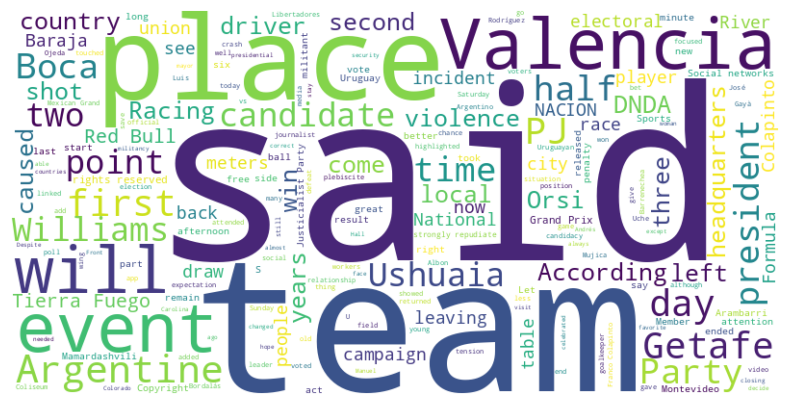

--------------------------------------------------


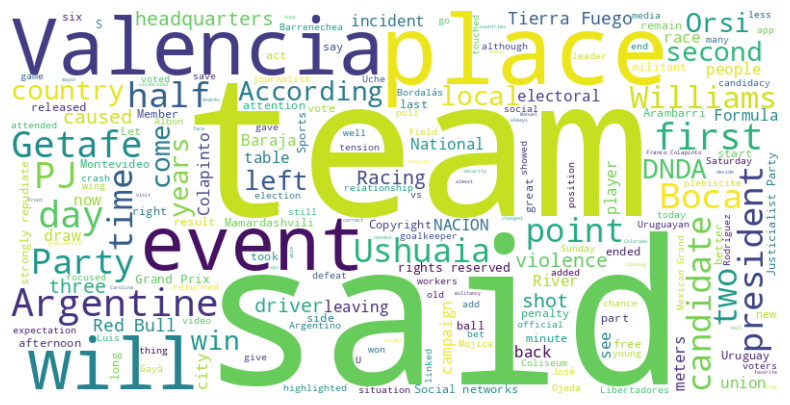

--------------------------------------------------
Word: said, Frequency: 1.0
Word: team, Frequency: 0.9444444444444444
Word: place, Frequency: 0.8333333333333334
Word: Valencia, Frequency: 0.6666666666666666
Word: event, Frequency: 0.6111111111111112
Word: will, Frequency: 0.5555555555555556
Word: Argentine, Frequency: 0.5555555555555556
Word: first, Frequency: 0.5
Word: day, Frequency: 0.5
Word: PJ, Frequency: 0.5
Word: Getafe, Frequency: 0.5
Word: Party, Frequency: 0.4444444444444444
Word: half, Frequency: 0.4444444444444444
Word: president, Frequency: 0.4444444444444444
Word: time, Frequency: 0.4444444444444444
Word: Boca, Frequency: 0.4444444444444444
Word: candidate, Frequency: 0.3888888888888889
Word: two, Frequency: 0.3888888888888889
Word: Ushuaia, Frequency: 0.3888888888888889
Word: point, Frequency: 0.3888888888888889
Word: Williams, Frequency: 0.3888888888888889
Word: According, Frequency: 0.3333333333333333
Word: Orsi, Frequency: 0.3333333333333333
Word: second, Frequency:

In [11]:
from deep_translator import GoogleTranslator

# Function to split the text into smaller chunks
def split_text(text, max_length):
    words = text.split(' ')
    chunks = []
    current_chunk = []

    for word in words:
        if len(' '.join(current_chunk + [word])) <= max_length:
            current_chunk.append(word)
        else:
            chunks.append(' '.join(current_chunk))
            current_chunk = [word]
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

# Reduce max_chars_per_chunk to avoid exceeding the limit
max_chars_per_chunk = 2000  # Adjusted to a safer limit
harris_chunks = split_text(harris_comb_text, max_chars_per_chunk)
trump_chunks = split_text(trump_comb_text, max_chars_per_chunk)

# Translate each chunk with error handling
translator = GoogleTranslator(source='auto', target='en')

def translate_chunks(chunks):
    translated_chunks = []
    for chunk in chunks:
        try:
            translated_chunk = translator.translate(chunk)
            translated_chunks.append(translated_chunk)
        except Exception as e:
            print(f"Translation error: {e}")
            translated_chunks.append("")  # Add empty string if translation fails
    return translated_chunks

translated_harris_chunks = translate_chunks(harris_chunks)
english_harris = ' '.join(translated_harris_chunks)

translated_trump_chunks = translate_chunks(trump_chunks)
english_trump = ' '.join(translated_trump_chunks)

# Generate and display the word clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(english_trump)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trump, interpolation='bilinear')
plt.axis('off')
plt.show()

print("-" * 50)

wordcloud_harris = WordCloud(width=800, height=400, background_color='white').generate(english_harris)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_harris, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display word frequencies
print("-" * 50)
words_frequencies_trump = wordcloud_trump.words_
for word, freq in words_frequencies_trump.items():
    print(f"Word: {word}, Frequency: {freq}")

print("-" * 50)
words_frequencies_harris = wordcloud_harris.words_
for word, freq in words_frequencies_harris.items():
    print(f"Word: {word}, Frequency: {freq}")